<a href="https://colab.research.google.com/github/Hydrateacher/transport_classification/blob/main/_2DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch
fastai.__version__

'2.7.12'

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyYAML: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=4cb5074f57953978a58847d948fa6710b1a7b0f04afd99af1636960b33b6c4b2
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built PyYAML
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting un

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the train-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 1138 MB, 23296 KB/s, 50 seconds passed
[DOWNLOAD] | File trai

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')
path.ls()
fls = get_image_files(path)
fls

(#600) [Path('train/Boat/0bdcc0a3d4bc4962.jpg'),Path('train/Boat/fc15034f42d79b91.jpg'),Path('train/Boat/708df4affe6f272e.jpg'),Path('train/Boat/0f263496e3bd80ec.jpg'),Path('train/Boat/a84e92550a2fc73c.jpg'),Path('train/Boat/57d8da6be9fd7dab.jpg'),Path('train/Boat/55ec7ab5764e9c95.jpg'),Path('train/Boat/b926a8a64c899d2a.jpg'),Path('train/Boat/674c72761c69ee5a.jpg'),Path('train/Boat/8bf760f2a5200267.jpg')...]

In [ ]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

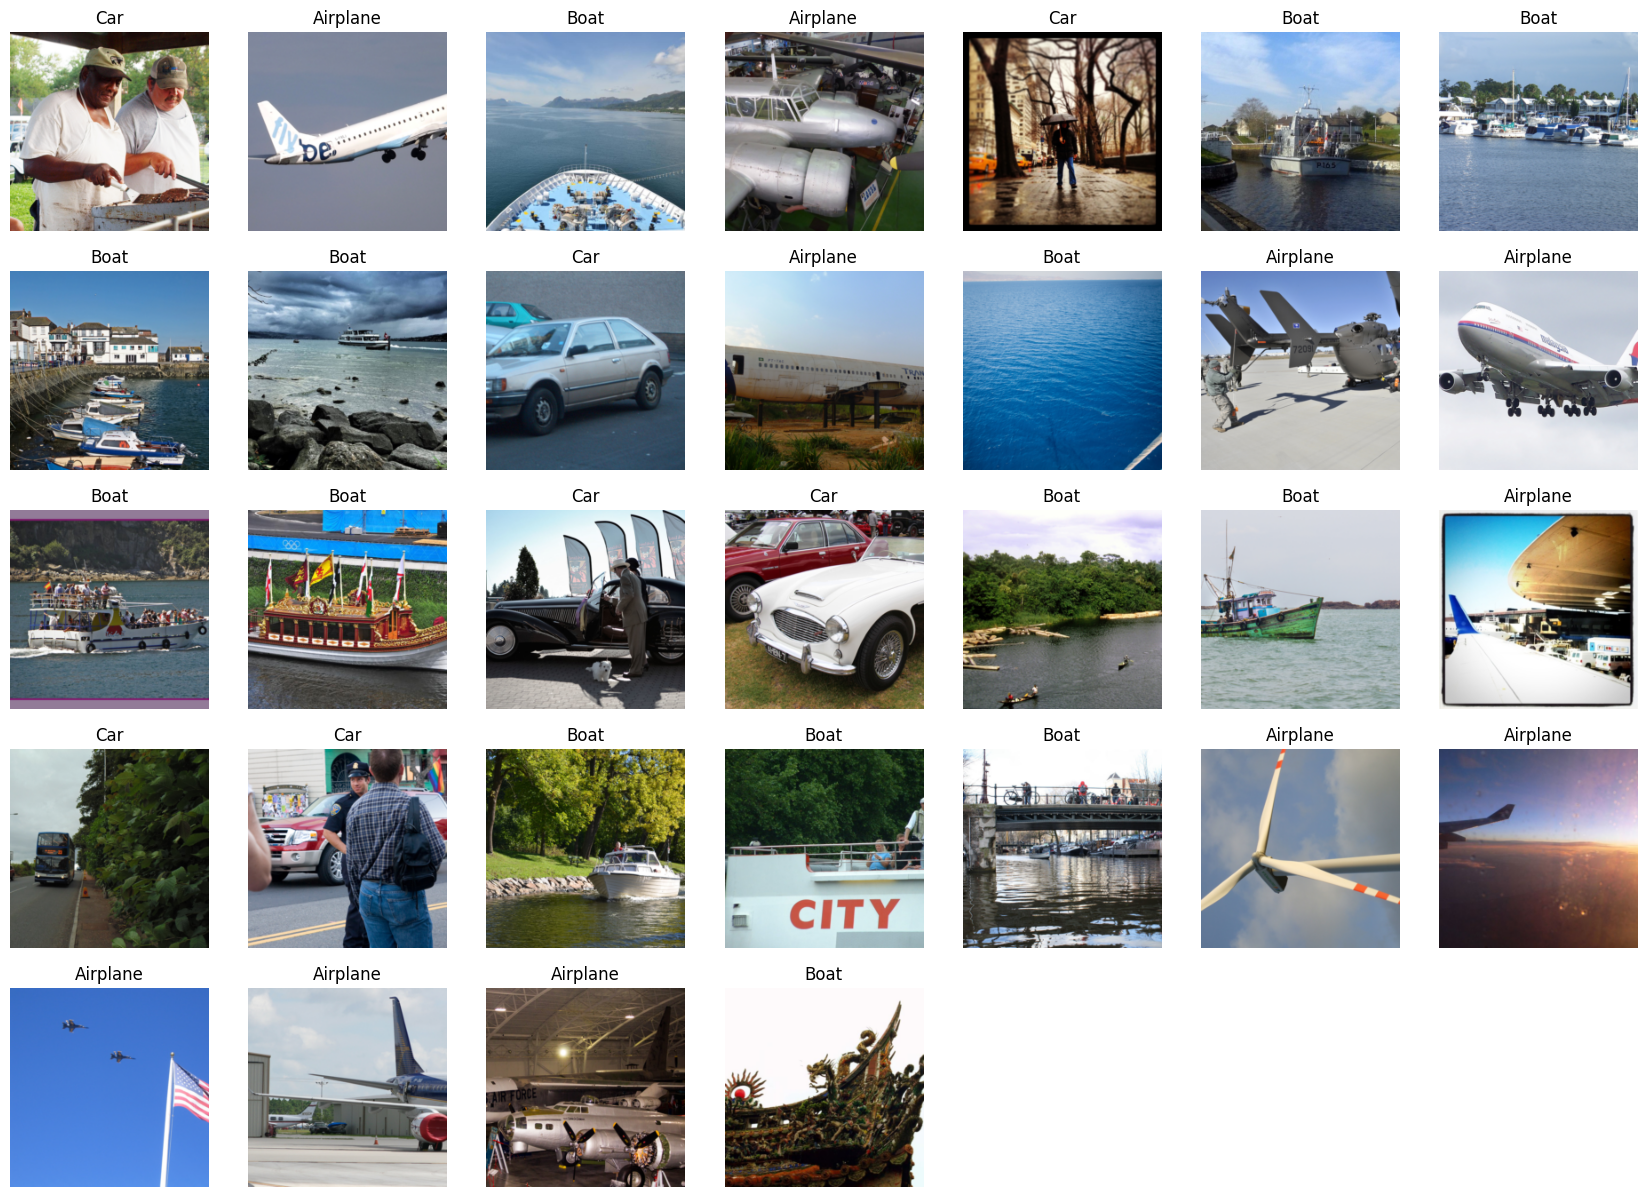

In [ ]:
#Datablock
transpotrs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader
dls = transpotrs.dataloaders(path)

#datasetni tekshirish
dls.train.show_batch(max_n=32)

In [ ]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.443184,0.274277,0.883333,03:08


epoch,train_loss,valid_loss,accuracy,time
0,0.482554,0.207841,0.925000,04:19
1,0.342403,0.155436,0.941667,04:18
2,0.244119,0.132271,0.950000,04:22
3,0.183842,0.146609,0.950000,04:16


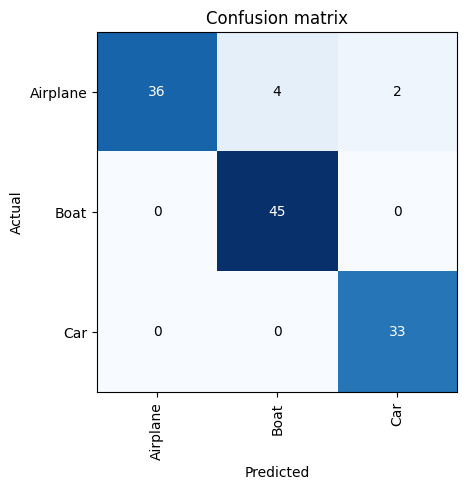

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

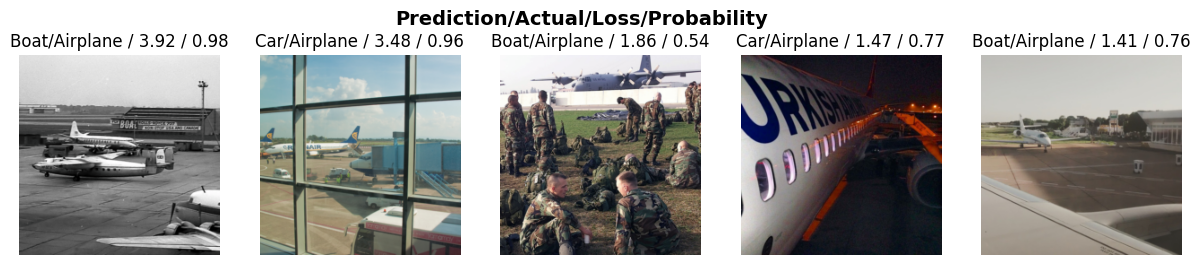

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Airplane
Ehtimollik: 71.9


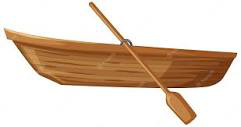

In [ ]:
img = PILImage.create(upload.data[-1])
pred , pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}")
img

In [ ]:
#saqlash
learn.export('transport_model.pkl')

In [ ]:
model = load_learner("/content/transport_model.pkl")

In [ ]:
model.predict(img)

('Airplane', tensor(0), tensor([7.1907e-01, 2.8087e-01, 5.2527e-05]))